# Trabalho 8 - Segmentação de imagens

## Preâmbulo

Segmentação é um processo que se refere a dividir a imagem digital em regições, agrupamento de pixels, ou objetos, para simplificar ou mudar a representação da imagem de forma tornar a sua análise mais simples.

Pode-se destacar alguns tipos de segmentação, a saber:

* Baseadas em formatos
  * Detecção de pontos
  * Detecção de descontinuidades
  * Detecção de bordas
  * Detecção de linhas
* Baseada em características dos pixels
  * Segmentação de cores
  * Segimentação de intensidades
* Utilizando movimento
* Baseada em histograma

Técnicas de segmentação também podem ser usadas para adicionar meta-informações aos pixels, como formato e tamanho da região, de forma a facilitar a análise dos pixels individualmente.


## Código

O código, apresentado a seguir, é separado nos métodos:
* image_side_by_side - plota duas imagens lado a lado;
* get_channel - obtem um dos canais de cor da imagem.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error


def image_side_by_side(imgs, titles):
	imgs = [np.round(img).astype("uint8") for img in imgs]
	plt.subplot(121), plt.imshow(imgs[0], cmap='gray'), plt.title(titles[0])
	plt.subplot(122), plt.imshow(imgs[1], cmap='gray'), plt.title(titles[1])
	plt.show()
    
def get_channel(image, channel_number):
	channel_cn = np.zeros(image.shape[:2])
	for x in range(image.shape[0]):
		for y in range(image.shape[1]):
			channel_cn[x, y] = image[x, y][channel_number]
	return channel_cn

## Resultados

Primeiramente a imagem do bambu é carregada e se obtem sua versão em tons de cinza.

Então é aplicado um filtro OTSU para uma limiarização à sua versão em tons de cinza, e o resultado é comparado com a imagem original, foi utilizado o valor de threshold de 50 e limite 100 escolhidos empíricamente.

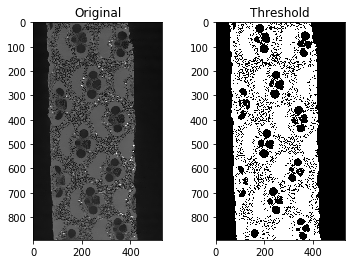

In [2]:
img = cv.imread('TI_0001.tif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 50, 100, cv.THRESH_OTSU)

image_side_by_side([gray, thresh], ['Original', 'Threshold'])

Conforme pode ser visto, na imagem acima, a limiarização aplicada apresenta uma grande quantidade de ruído, então é aplicado um filtro morfológico de abertura com uma matriz 5x5 e 3 iterações para diminuir o ruído da imagem encontrada.

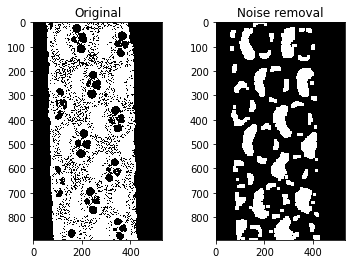

In [3]:
kernel = np.ones((5, 5), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=3)
image_side_by_side([thresh, opening], ['Original', 'Noise removal'])

Conforme pode-se ver acima, o filtro foi bastante efetivo na detecção de ruído e temos uma imagem bem mais próxima das esclerênquimas.

Agora utilizando a segmentação obtida após o filtro de redução de ruídos para colorir a estes segmentos na imagem original temos o seguinte resultado.

Valores encontrados: [  0 100]


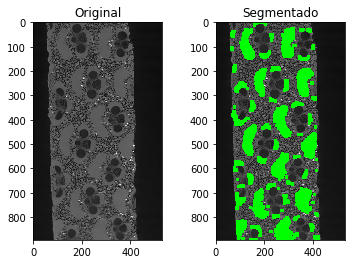

In [4]:
colorir = np.array(img, copy=True)

print(f"Valores encontrados: {np.unique(opening)}")

for x in range(colorir.shape[0]):
	for y in range(colorir.shape[1]):
		# print(f"{x},{y}={opening[x, y]}")
		if opening[x, y] >= 100:
			colorir[x, y] = np.array([0, 255, 0])


image_side_by_side([img, colorir], ['Original', 'Segmentado'])

Agora comparando a imagem encontrada com aquela fornecida como resultado esperado pode-se ver que as mesmas esclerênquimas foram econtradas, contudo o resultado esperado apresenta regiões mais suaves.

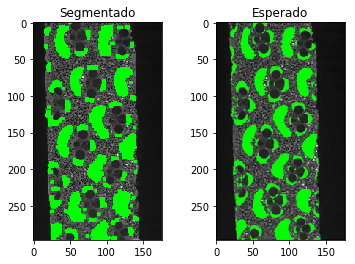

In [5]:
esperado = cv.imread('ResultadoEsperado.png')
cy = [5, 181]
cx = [4, 301]
colorir = cv.resize(colorir, (esperado.shape[1], esperado.shape[0]))
colorir = colorir[cx[0]:cx[1], cy[0]:cy[1]]
esperado = esperado[cx[0]:cx[1], cy[0]:cy[1]]
image_side_by_side([colorir, esperado], ['Segmentado', 'Esperado'])

Para fazer uma comparação mais quantitativa, a imagem segmentada foi redimensionada para o tamanho da imagem esperada e foram cortadas para remover o contorno branco de modo a diminuir erros na comparação.

Foi utilizado o erro quadrático médio para comparar os erros para cada um dos canais da imagem, podemos ver que o erro foi muito maior no canal B e foi diminuindo sucessivamente nos outros canais.

Contudo a segmentação foi destacada apenas com verde puro, desta forma os erros nos outros canais podem ser causados por outros problemas na comparação da imagem, o arquivo utilizado nesse trabalho utiliza codificação TIFF enquanto a imagem esperada utiliza codificação PNG, além de ter sido necessário adaptar o tamanho imagem sendo trabalhada para adequar à imagem esperada, sendo ambos possíveis geradores de erros.

In [6]:
print(f"B={mean_squared_error(get_channel(colorir, 0), get_channel(esperado, 1))}, "
	  f"G={mean_squared_error(get_channel(colorir, 1), get_channel(esperado, 1))}, "
	  f"R={mean_squared_error(get_channel(colorir, 2), get_channel(esperado, 2))}")

B=10660.914772727272, G=4284.772019436792, R=939.2900788184878


## Discussão

Conforme analisado nos resultados, apesar de terem sido encontrada diferença nos canais de cores da imagem gerada comparada com a imagem esperada, numa análise qualitativa, foi possível identificar as mesmas esclerênquimas.
Tendo em vista as possíveis fontes de erros da diferença de codificação e conversão de tamanho das imagens, pode-se dizer que o resultado encontrado apresentou resultados razoáveis em comparação ao esperado.